## Fonction d'histogramme

Fonction pour afficher un histogramme facilement :

In [29]:
def plot_measure(circ):
    from qiskit import Aer, transpile
    from qiskit.visualization import plot_histogram

    circ.measure_all()
    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=10000)
    result_sim = job.result()
    counts = result_sim.get_counts(compiled_circuit)
    return plot_histogram(counts)

## Circuit

Commençons le circuit :

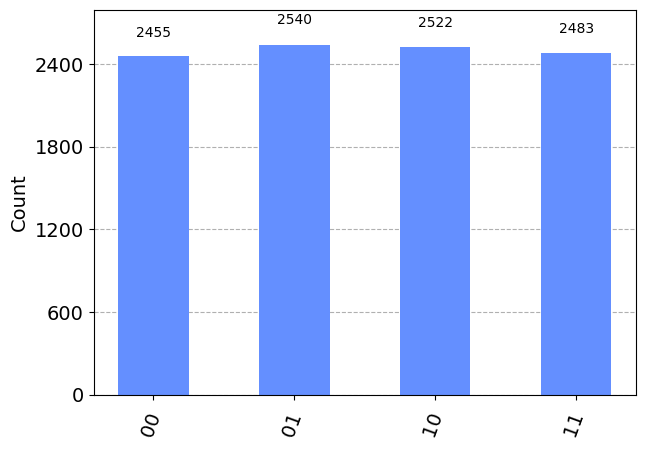

In [30]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(2)
c = ClassicalRegister(0)
circuit = QuantumCircuit(q, c)

circuit.h(0)
circuit.h(1)

circuit.barrier()

circuit.x(0)
circuit.cz(0, 1)
circuit.x(0)

circuit.barrier()

plot_measure(circuit.copy())

## Le diffuseur

On peut voir sur l'histogramme ci-dessus que les probabilités d'emprunter chaque grimoire sont presque égale.

Implémentons le diffuseur...

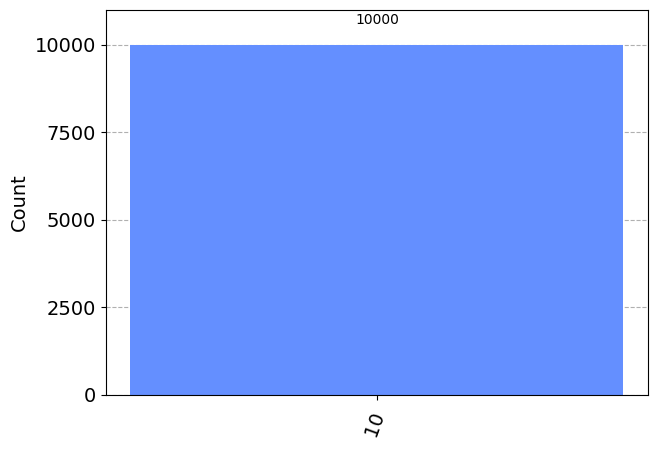

In [31]:
circuit.h(0)
circuit.h(1)

circuit.z(0)
circuit.z(1)

circuit.cz(0, 1)

circuit.h(0)
circuit.h(1)

plot_measure(circuit)

Maintenant, les probabilités sont toutes concentrées sur un seul grimoire.

Voici le circuit terminé :

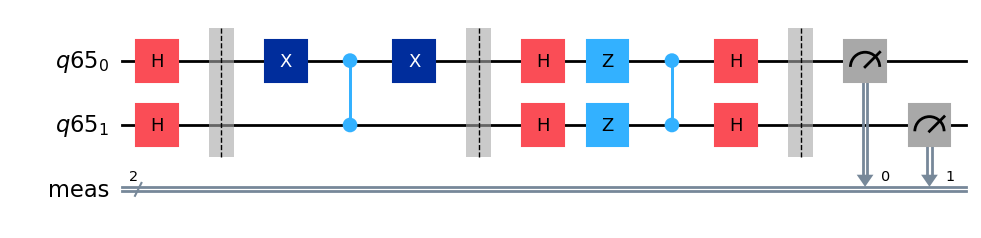

In [32]:
circuit.draw('mpl', style='iqp')